<a href="https://colab.research.google.com/github/surajjorwar/Insurance-claim-prediction/blob/main/insurance_claim_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  r2_score,accuracy_score




In [2]:
df = pd.read_csv('/content/drive/MyDrive/insurance claim prediction/insurance3r2.csv')

In [3]:
df.head()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,3,16884.92400,1
1,18,1,33.770,3008,1,0,2,1725.55230,1
2,28,1,33.000,3009,3,0,2,4449.46200,0
3,33,1,22.705,10009,0,0,1,21984.47061,0
4,32,1,28.880,8010,0,0,1,3866.85520,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   steps           1338 non-null   int64  
 4   children        1338 non-null   int64  
 5   smoker          1338 non-null   int64  
 6   region          1338 non-null   int64  
 7   charges         1338 non-null   float64
 8   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 94.2 KB


In [5]:
df.describe()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,5328.623318,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,2453.643236,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,3000.000000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,3008.000000,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,4007.000000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,8004.000000,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,10010.000000,5.000000,1.000000,3.000000,63770.428010,1.000000


(array([137., 141., 139., 132., 125., 135., 144., 143., 128., 114.]),
 array([15., 20., 25., 30., 35., 40., 45., 50., 55., 60., 65.]),
 <BarContainer object of 10 artists>)

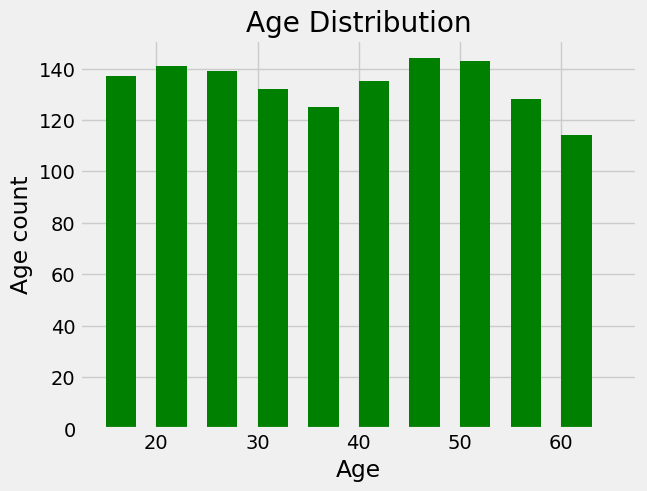

In [6]:
plt.style.use('fivethirtyeight')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Age count')
plt.hist(df['age'],bins = [15,20,25,30,35,40,45,50,55,60,65],width = 3, color = 'green')


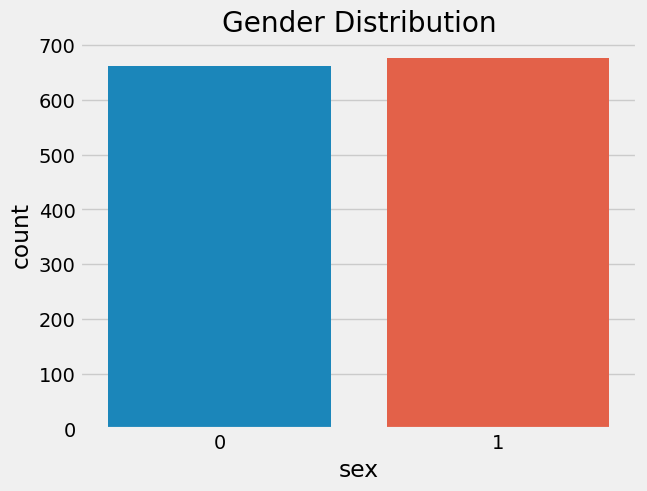

In [7]:
plt.title('Gender Distribution')
sns.countplot(x= 'sex', data= df,saturation = .75)
plt.show()

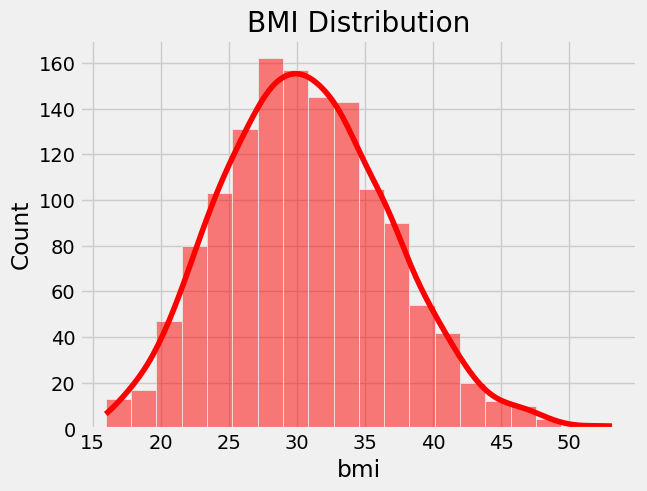

In [8]:
plt.title("BMI Distribution")
sns.histplot(df['bmi'],bins = 20,kde = True,color = 'red')
plt.show()

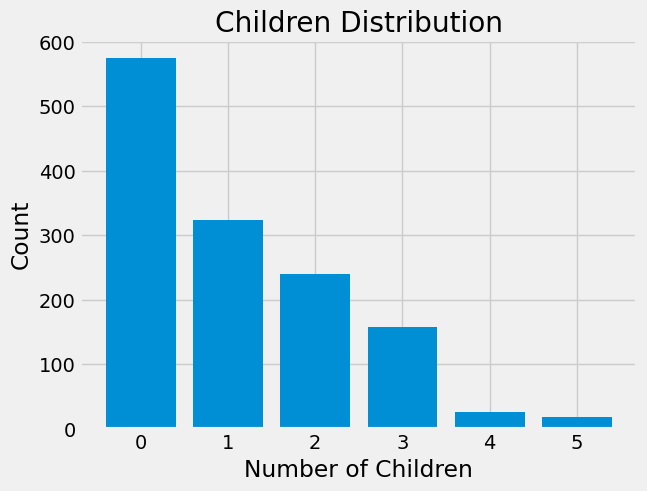

In [9]:
plt.title('Children Distribution')
children_counts = df['children'].value_counts()
plt.bar(children_counts.index, children_counts)
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.show()

In [10]:
(df['smoker'].value_counts()/df['smoker'].count())*100

0    79.521674
1    20.478326
Name: smoker, dtype: float64

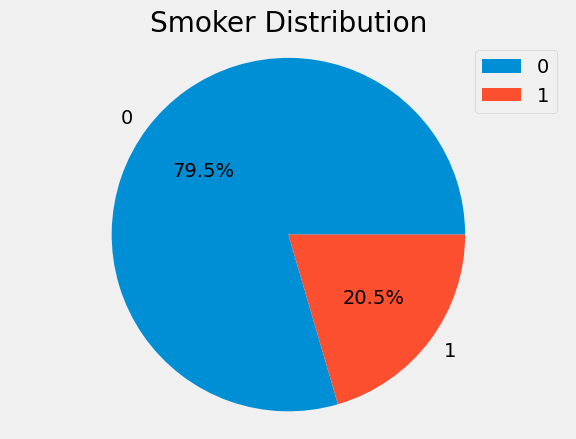

In [11]:
plt.title('Smoker Distribution')
smoker_count = df['smoker'].value_counts()
plt.pie(smoker_count, labels=smoker_count.index, autopct='%.1f%%')
plt.legend()# 0 = nonsmoker , 1 = smoker
plt.axis('equal')
plt.show()

In [12]:

df1 = df[df['smoker']==1]
df0 = df[df['smoker']==0]

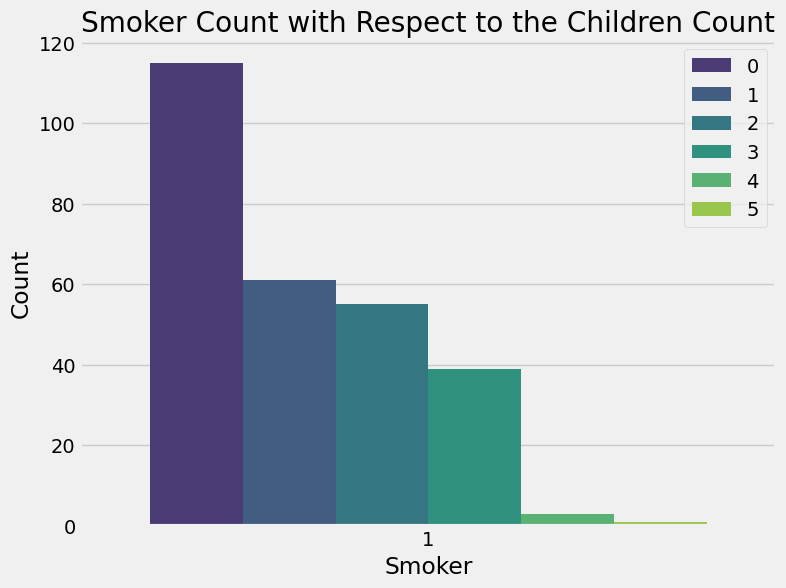

In [13]:
#forsmokers
plt.figure(figsize=(8, 6))
plt.title('Smoker Count with Respect to the Children Count')
sns.countplot(x=df1['smoker'], hue =df.children, palette='viridis')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.legend()
plt.show()

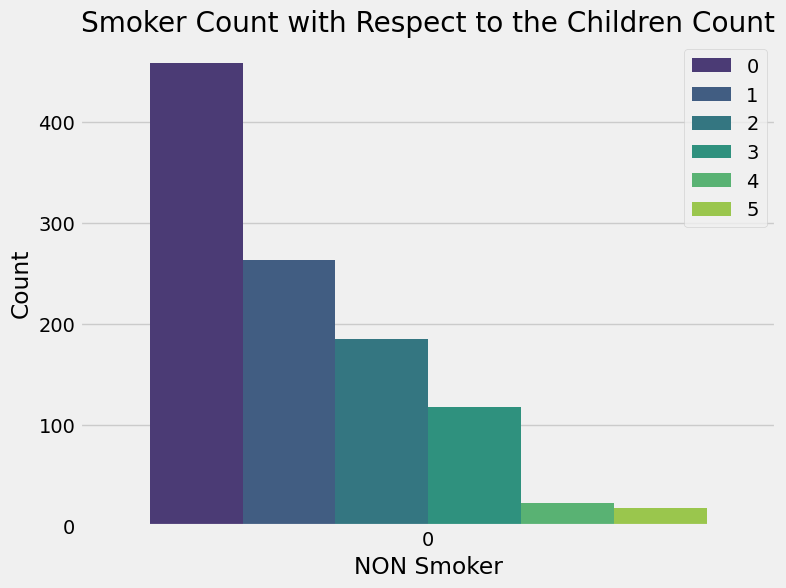

In [14]:
#for non smokers
plt.figure(figsize=(8, 6))
plt.title('Smoker Count with Respect to the Children Count')
sns.countplot(x=df0['smoker'], hue =df0.children, palette='viridis')
plt.xlabel('NON Smoker')
plt.ylabel('Count')
plt.legend()
plt.show()

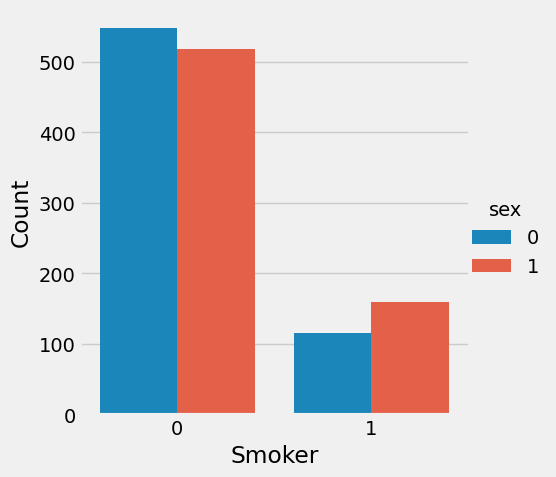

In [15]:
# Smoker Count with Gender
sns.catplot(x="smoker", kind="count", hue='sex', data=df)
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

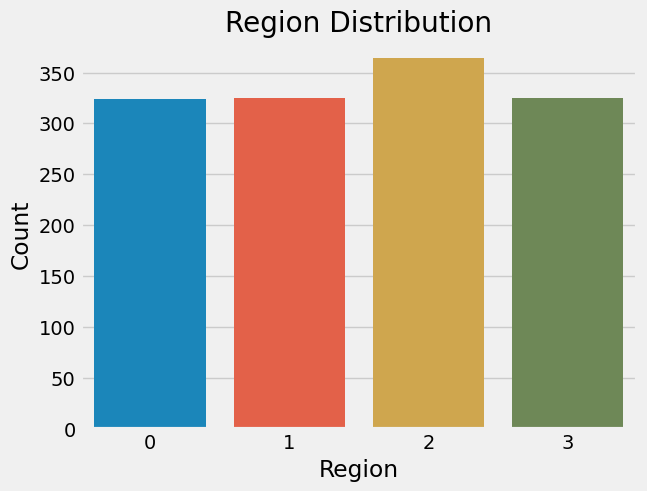

In [16]:
plt.title('Region Distribution')
sns.countplot(x = 'region', data = df)
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

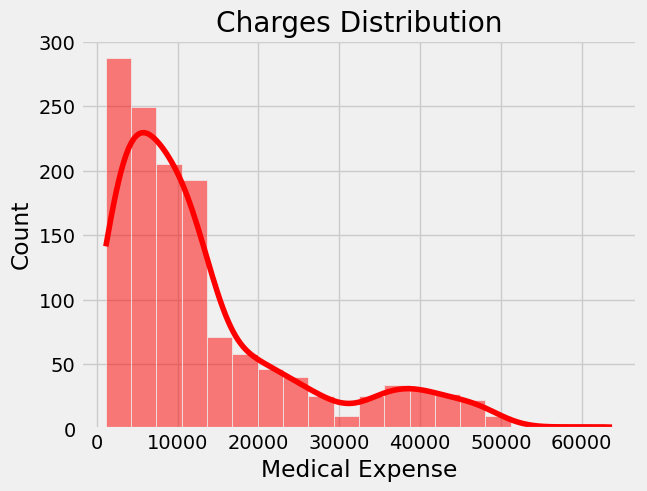

In [17]:
plt.title('Charges Distribution')
sns.histplot(df.charges,bins=20, kde=True,color='red')
plt.xlabel('Medical Expense')
plt.ylabel('Count')
plt.show()

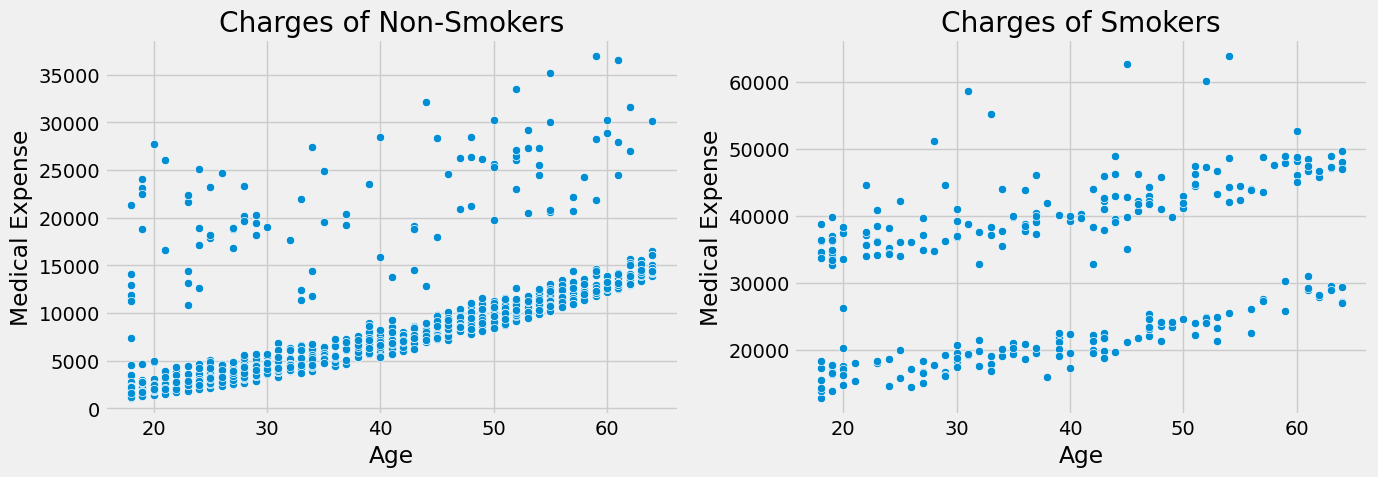

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot for charges of non-smokers
sns.scatterplot(x="age", y="charges", data=df[df['smoker'] == 0], ax=axes[0])
axes[0].set_title('Charges of Non-Smokers')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Medical Expense')

# Scatter plot for charges of smokers
sns.scatterplot(x="age", y="charges", data=df[df['smoker'] == 1], ax=axes[1])
axes[1].set_title('Charges of Smokers')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Medical Expense')

plt.tight_layout()
plt.show()

In [19]:
# correlation matrix
df.corr()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,-0.167957,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,-0.039470,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,-0.681149,0.012759,0.003750,0.157566,0.198341,0.384198
steps,-0.167957,-0.039470,-0.681149,1.000000,0.055346,-0.267845,-0.076483,-0.305570,-0.419514
children,0.042469,0.017163,0.012759,0.055346,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,-0.267845,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,-0.076483,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,-0.305570,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.419514,-0.409526,0.333261,0.020891,0.309418,1.000000


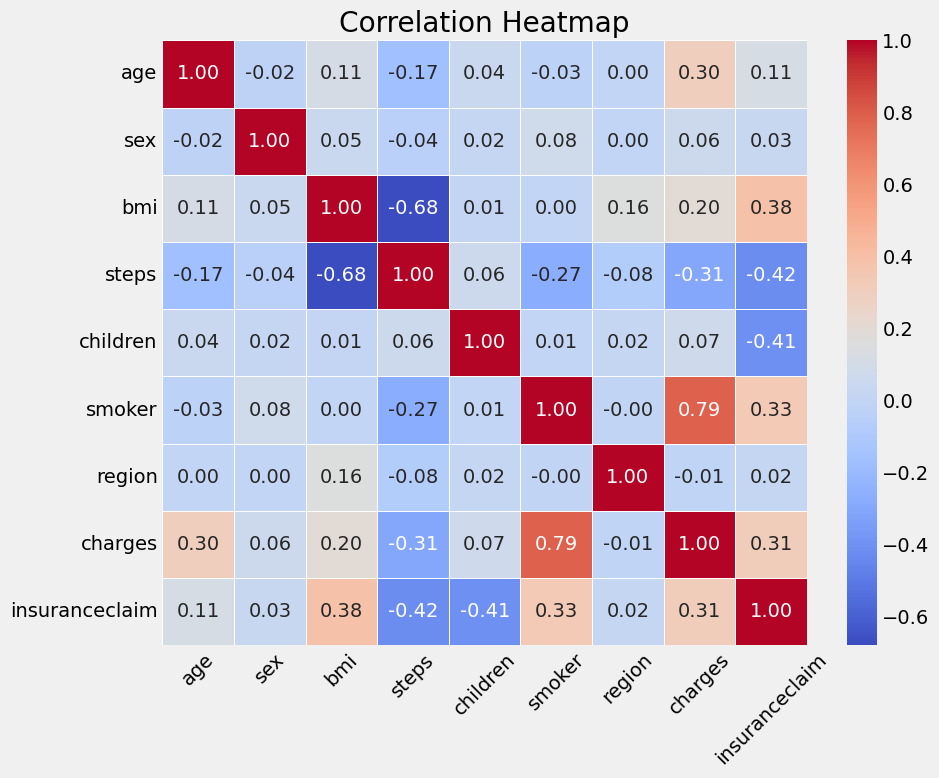

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [21]:
# taking our input data and output
x = df.drop(columns = ['insuranceclaim'])
y = df['insuranceclaim']

In [22]:
# spliting the dataset into train and test

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 10)

In [23]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1003, 8)
(335, 8)
(1003,)
(335,)


**Applying Logistic Regression**

In [24]:
model = LogisticRegression()

In [25]:
# traing the model with train data
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test,y_pred)

0.8477611940298507

**Applying Naive Bayes Classifier**

In [26]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred = nb.predict(x_test)
accuracy_score(y_test,y_pred)

0.8208955223880597

**Applying Decision Tree Classifier**

In [27]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.9791044776119403